<a href="https://colab.research.google.com/github/johnatandin/desafio-telecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [5]:
import pandas as pd

# O link "raw" do seu arquivo JSON no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

try:
    # Usa o pandas para ler o JSON diretamente da URL
    df = pd.read_json(url)

    print("Dados carregados com sucesso para um DataFrame!")
    print("\nAs 5 primeiras linhas do seu DataFrame:")
    print(df.head())
    print("\nInformações sobre o DataFrame:")
    df.info()

except Exception as e:
    print(f"Ops! Houve um erro ao tentar carregar o arquivo JSON: {e}")

Dados carregados com sucesso para um DataFrame!

As 5 primeiras linhas do seu DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL',

In [6]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [7]:
print("DataFrame Original (com colunas aninhadas):")
print(df.head())
print("\n" + "="*50 + "\n") # Separador para melhor visualização

# --- Começando a Normalização ---

# 1. Normalizar a coluna 'customer'
df_customer = pd.json_normalize(df['customer'], sep='_')
# O prefixo pode ser útil para evitar conflito de nomes de colunas, mas neste caso,
# os nomes já são auto-explicativos e não se repetem em outras sub-colunas.
# df_customer = pd.json_normalize(df['customer'], sep='_', prefix='customer_')

# 2. Normalizar a coluna 'phone'
df_phone = pd.json_normalize(df['phone'], sep='_')
# df_phone = pd.json_normalize(df['phone'], sep='_', prefix='phone_')


# 3. Normalizar a coluna 'internet'
df_internet = pd.json_normalize(df['internet'], sep='_')
# df_internet = pd.json_normalize(df['internet'], sep='_', prefix='internet_')

# 4. Normalizar a coluna 'account'
# Note que 'Charges' está aninhado dentro de 'account', então o pd.json_normalize()
# vai cuidar disso também, criando 'Charges_Monthly' e 'Charges_Total'.
df_account = pd.json_normalize(df['account'], sep='_')
# df_account = pd.json_normalize(df['account'], sep='_', prefix='account_')

# Agora, vamos juntar tudo de volta ao DataFrame original
# Primeiro, removemos as colunas originais aninhadas do df principal
df_flat = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Em seguida, concatenamos os DataFrames normalizados.
# O 'axis=1' significa que estamos concatenando colunas.
# O 'join="inner"' garante que as linhas correspondam corretamente.
df_normalized = pd.concat([df_flat, df_customer, df_phone, df_internet, df_account], axis=1)

print("DataFrame Normalizado:")
print(df_normalized.head())

print("\nInformações do DataFrame Normalizado:")
df_normalized.info()

DataFrame Original (com colunas aninhadas):
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetServi

In [9]:
df_normalized.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação

In [12]:
# --- Tratamento da coluna 'Charges_Total' ---

# Primeiro, vamos inspecionar valores únicos na coluna Charges_Total para entender o problema.
# É comum que valores que deveriam ser numéricos venham como strings vazias ou espaços.
# print("Valores únicos em 'Charges_Total' antes da conversão (primeiros 10, se muitos):")
# print(df_normalized['Charges_Total'].value_counts().head(10))

# Converter 'Charges_Total' para numérico.
# O parâmetro 'errors='coerce'' transformará quaisquer valores que não possam ser convertidos
# em números em NaN (Not a Number). Isso é crucial para identificar e lidar com eles.
df_normalized['Charges_Total'] = pd.to_numeric(df_normalized['Charges_Total'], errors='coerce')

# Verificar se foram criados NaNs após a conversão (indicando valores não numéricos que foram coercidos)
print("\nVerificando NaNs na coluna 'Charges_Total' após conversão:")
print(df_normalized['Charges_Total'].isnull().sum())

# Se houver NaNs, vamos investigar as linhas correspondentes.
# Geralmente, são clientes novos que ainda não têm cobrança total.
if df_normalized['Charges_Total'].isnull().sum() > 0:
    print("\nLinhas com NaN em 'Charges_Total' (provavelmente clientes novos):")
    print(df_normalized[df_normalized['Charges_Total'].isnull()])
    # Para esses casos, uma abordagem comum é preencher NaN com 0,
    # já que clientes novos podem não ter Charges_Total ainda.
    df_normalized['Charges_Total'] = df_normalized['Charges_Total'].fillna(0)
    print("\nNaNs em 'Charges_Total' preenchidos com 0.")
    print(df_normalized['Charges_Total'].isnull().sum()) # Deve ser 0 agora

# --- Verificar os tipos de dados novamente após o tratamento ---
print("\nInformações do DataFrame após o tratamento de 'Charges_Total':")
df_normalized.info()


Verificando NaNs na coluna 'Charges_Total' após conversão:
11

Linhas com NaN em 'Charges_Total' (provavelmente clientes novos):
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male    


Gerando Gráfico 1: Churn por Tipo de Contrato...


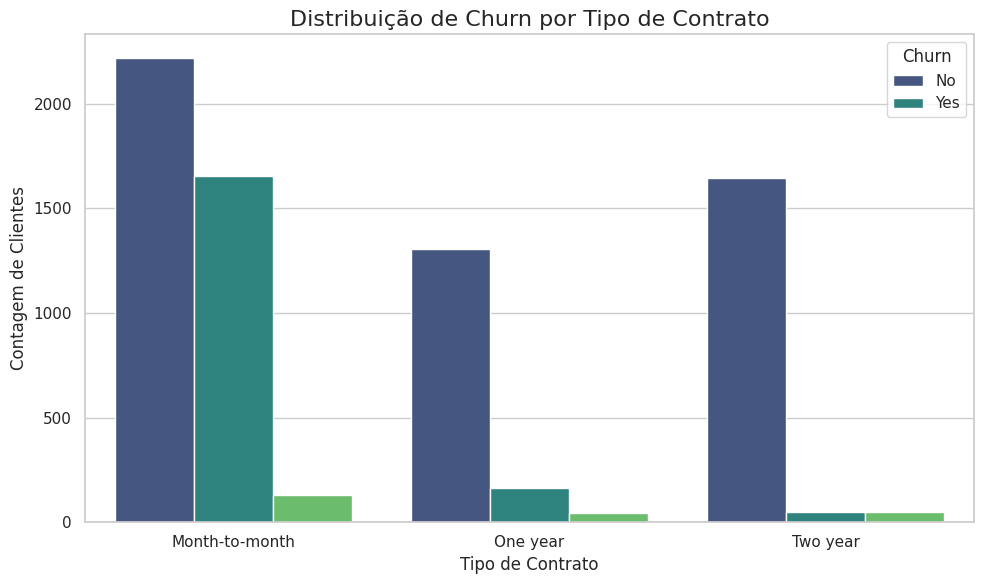


Gerando Gráfico 2: Churn por Serviço de Internet...


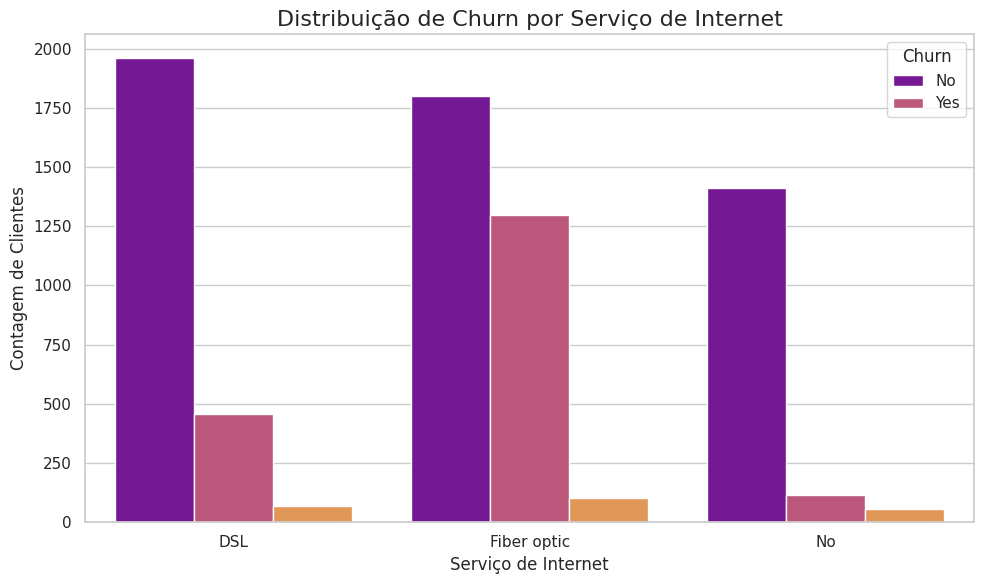


Gerando Gráfico 3: Churn por Tempo de Contrato (Tenure)...


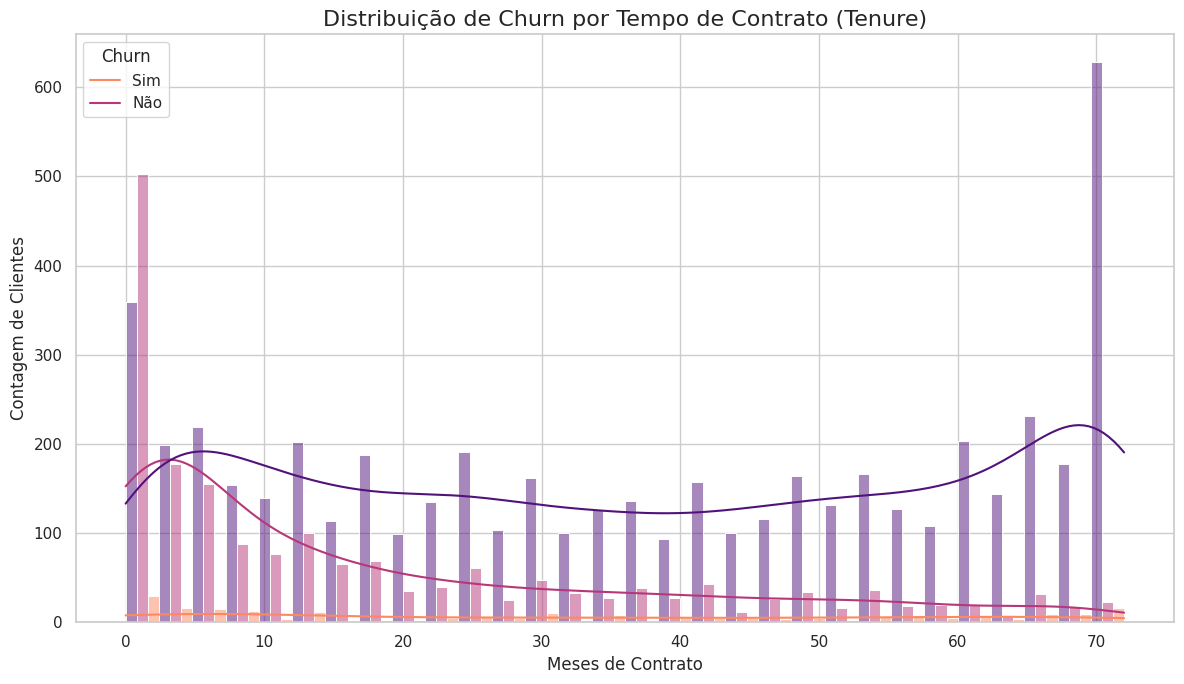


Gerando Gráfico 4: Churn por Cobrança Mensal...


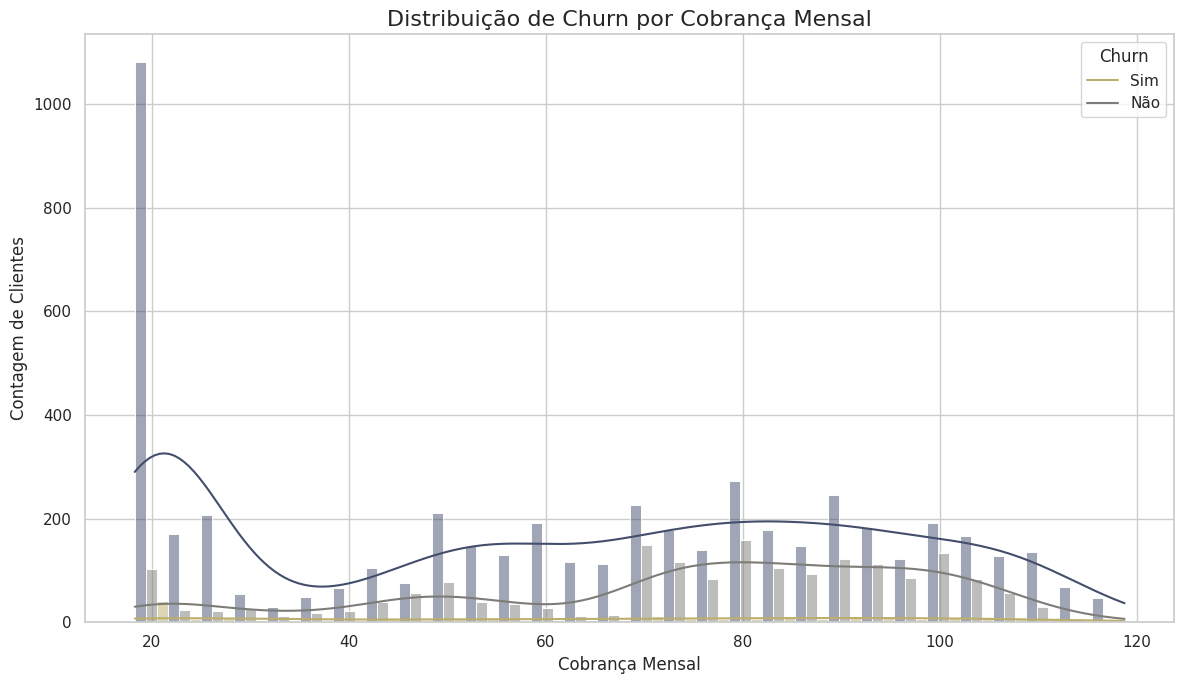

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
 #
 # Etapa 4: Criação dos Gráficos

 #
    # Definir um estilo visual para os gráficos
sns.set_theme(style="whitegrid")

    # --- Gráfico 1: Churn por Tipo de Contrato ---
print("\nGerando Gráfico 1: Churn por Tipo de Contrato...")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_normalized, x='Contract', hue='Churn', palette='viridis', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

    # --- Gráfico 2: Churn por Serviço de Internet ---
print("\nGerando Gráfico 2: Churn por Serviço de Internet...")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_normalized, x='InternetService', hue='Churn', palette='plasma')
plt.title('Distribuição de Churn por Serviço de Internet', fontsize=16)
plt.xlabel('Serviço de Internet', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

    # --- Gráfico 3: Churn por Tempo de Contrato (Tenure) ---
print("\nGerando Gráfico 3: Churn por Tempo de Contrato (Tenure)...")
plt.figure(figsize=(12, 7))
sns.histplot(data=df_normalized, x='tenure', hue='Churn', multiple='dodge', kde=True, palette='magma', bins=30)
plt.title('Distribuição de Churn por Tempo de Contrato (Tenure)', fontsize=16)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Churn', labels=['Sim', 'Não'])
plt.tight_layout()
plt.show()

    # --- Gráfico 4: Churn por Cobrança Mensal ---
print("\nGerando Gráfico 4: Churn por Cobrança Mensal...")
plt.figure(figsize=(12, 7))
sns.histplot(data=df_normalized, x='Charges_Monthly', hue='Churn', multiple='dodge', kde=True, palette='cividis', bins=30)
plt.title('Distribuição de Churn por Cobrança Mensal', fontsize=16)
plt.xlabel('Cobrança Mensal', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Churn', labels=['Sim', 'Não'])
plt.tight_layout()
plt.show()

In [22]:
#Coluna de Contas Diárias

df_normalized['Contas_Diarias'] = df_normalized['Charges_Monthly'] / 30
df_normalized['Contas_Diarias']


,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [23]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [26]:
# É uma boa prática criar uma cópia para manter o DataFrame original intacto
df_transformado = df_normalized.copy()
    # --- Etapa 2: Mapeamento de Colunas Binárias ---
    # Converte colunas com 'Yes'/'No' para 1/0
print("Iniciando mapeamento de colunas binárias...")
colunas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for coluna in colunas_binarias:
    df_transformado[coluna] = df_transformado[coluna].map({'Yes': 1, 'No': 0})

    # Converte a coluna de gênero para 1/0
    df_transformado['gender'] = df_transformado['gender'].map({'Male': 1, 'Female': 0})
    print("Mapeamento binário concluído.")

    # --- Etapa 3: One-Hot Encoding para Colunas Categóricas ---
    print("\nIniciando One-Hot Encoding...")
    # Lista de colunas com mais de duas categorias para transformar
    colunas_categoricas = [
        'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract',
        'PaymentMethod'
    ]

    # Usa a função get_dummies do pandas para criar as novas colunas
    # drop_first=True é usado para evitar redundância (multicolinearidade) nos dados
df_transformado = pd.get_dummies(df_transformado, columns=colunas_categoricas, drop_first=True)
print("One-Hot Encoding concluído.")

    # --- Etapa 4: Remover Coluna de ID ---
    # A coluna 'customerID' não é útil para modelos de previsão
df_transformado.drop('customerID', axis=1, inplace=True)
print("\nColuna 'customerID' removida.")

    # --- Etapa 5: Verificação e Salvamento ---
print("\nProcesso de transformação finalizado!")

    # Mostra as primeiras 5 linhas do DataFrame transformado
print("\nAmostra do DataFrame final:")
print(df_transformado.head())

    # Salva o DataFrame final, pronto para modelagem, em um novo arquivo CSV
caminho_saida = 'TelecomX_Model_Ready.csv'
df_transformado.to_csv(caminho_saida, index=False)

Iniciando mapeamento de colunas binárias...
Mapeamento binário concluído.

Iniciando One-Hot Encoding...
Mapeamento binário concluído.

Iniciando One-Hot Encoding...
Mapeamento binário concluído.

Iniciando One-Hot Encoding...
Mapeamento binário concluído.

Iniciando One-Hot Encoding...
Mapeamento binário concluído.

Iniciando One-Hot Encoding...
One-Hot Encoding concluído.

Coluna 'customerID' removida.

Processo de transformação finalizado!

Amostra do DataFrame final:
   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0     NaN              0        1           1       9             1   
1    0.0     NaN              0        0           0       9             1   
2    1.0     NaN              0        0           0       4             1   
3    1.0     NaN              1        1           0      13             1   
4    1.0     NaN              1        1           0       3             1   

   PaperlessBilling  Charges_Monthly  Charges_Total  ..

#📊 Carga e análise

In [29]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [30]:
# --- Etapa 2: Análise Descritiva de Colunas Numéricas ---
print("### Análise Descritiva: Colunas Numéricas ###")

    # O método .describe() calcula as principais métricas para colunas numéricas
    # Usamos .round(2) para arredondar os valores para 2 casas decimais, facilitando a leitura
estatisticas_numericas = df_normalized.describe().round(2)

    # Imprime a tabela de estatísticas numéricas
print(estatisticas_numericas)
print("\n" * 2) # Adiciona um espaço para separar as seções

    # --- Etapa 3: Análise Descritiva de Colunas Categóricas ---
print("### Análise Descritiva: Colunas Categóricas (Texto) ###")

    # Usamos o parâmetro include=['object'] para analisar apenas as colunas de texto
estatisticas_categoricas = df_normalized.describe(include=['object'])

    # Imprime a tabela de estatísticas categóricas
print(estatisticas_categoricas)

### Análise Descritiva: Colunas Numéricas ###
       SeniorCitizen   tenure  Charges_Monthly  Charges_Total  Contas_Diarias
count        7267.00  7267.00          7267.00        7267.00         7267.00
mean            0.16    32.35            64.72        2277.18            2.16
std             0.37    24.57            30.13        2268.65            1.00
min             0.00     0.00            18.25           0.00            0.61
25%             0.00     9.00            35.42         396.20            1.18
50%             0.00    29.00            70.30        1389.20            2.34
75%             0.00    55.00            89.88        3778.52            3.00
max             1.00    72.00           118.75        8684.80            3.96



### Análise Descritiva: Colunas Categóricas (Texto) ###
        customerID Churn gender Partner Dependents PhoneService MultipleLines  \
count         7267  7267   7267    7267       7267         7267          7267   
unique        7267     3      2


Dados limpos. Total de registros válidos para o gráfico: 7043

Contagem de clientes por status de Churn (após limpeza):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Gerando o gráfico...


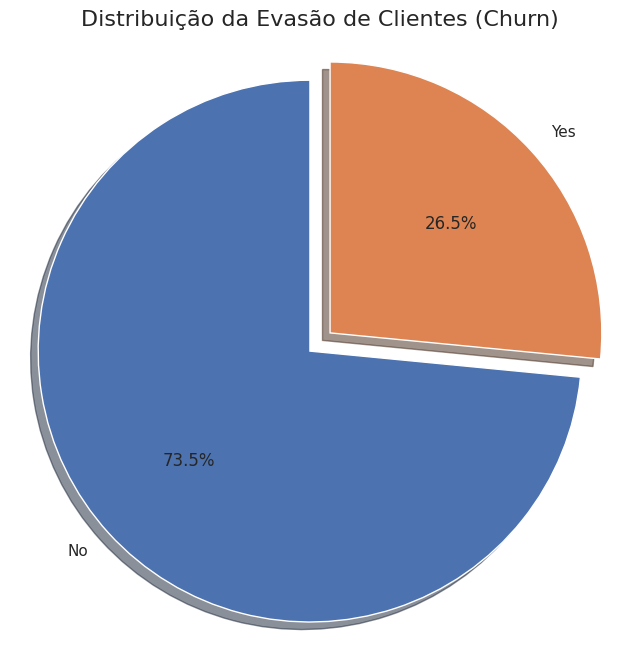

In [34]:
# --- Etapa 2: LIMPEZA DOS DADOS (A CORREÇÃO DO ERRO) ---
    # Vamos garantir que estamos trabalhando apenas com 'Yes' e 'No'
    # Esta linha remove quaisquer registros onde 'Churn' seja uma string vazia ou outro valor.
df_limpo = df_normalized[df_normalized['Churn'].isin(['Yes', 'No'])].copy()

print(f"\nDados limpos. Total de registros válidos para o gráfico: {len(df_limpo)}")

    # --- Etapa 3: Preparar os Dados para o Gráfico ---
    # Conta a ocorrência de 'Yes' e 'No' no DataFrame JÁ LIMPO
churn_counts = df_limpo['Churn'].value_counts()

print("\nContagem de clientes por status de Churn (após limpeza):")
print(churn_counts)

    # --- Etapa 4: Gerar o Gráfico de Pizza ---
print("\nGerando o gráfico...")

plt.figure(figsize=(8, 8))

    # Agora o 'explode' (com 2 valores) corresponderá ao churn_counts (com 2 valores)
plt.pie(
        churn_counts,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.1, 0),  # Corresponde a 'Yes' e 'No'
        shadow=True
    )

plt.title('Distribuição da Evasão de Clientes (Churn)', fontsize=16)
plt.axis('equal')
plt.show()








# Análise do Gráfico:

# Como o gráfico ilustra, a grande maioria dos clientes permanece na empresa:
# 73,5% dos clientes não cancelaram o serviço (No).
# 26,5% dos clientes cancelaram o serviço (Yes).
# Isso significa que, embora a maioria seja leal, mais de um quarto da base de clientes foi perdida para o churn, um número significativo que justifica a investigação das causas e a criação de modelos para prever e mitigar essas perdas no futuro.

In [35]:
##PAUSA PARA EXPORTAR E SALVAR O DATAFRAME
# Importa a biblioteca de arquivos do Google Colab
from google.colab import files

# Define o nome que você quer dar ao arquivo
nome_do_arquivo = 'telecomX_dataframe.csv'

# --- Início do Processo ---
try:
    # Converte o seu DataFrame 'df' para o formato CSV
    # O comando 'index=False' é MUITO IMPORTANTE para não salvar o índice do pandas como uma coluna extra
    df_limpo.to_csv(nome_do_arquivo, index=False, encoding='utf-8')

    print(f"DataFrame salvo como '{nome_do_arquivo}' com sucesso!")

    # Inicia o download do arquivo para o seu computador
    files.download(nome_do_arquivo)

except NameError:
    print("ERRO: A variável 'df' não foi encontrada.")
    print("Certifique-se de que você já criou o DataFrame antes de executar este código.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame salvo como 'telecomX_dataframe.csv' com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Gerando gráfico para: Contract...
Gerando gráfico para: PaymentMethod...


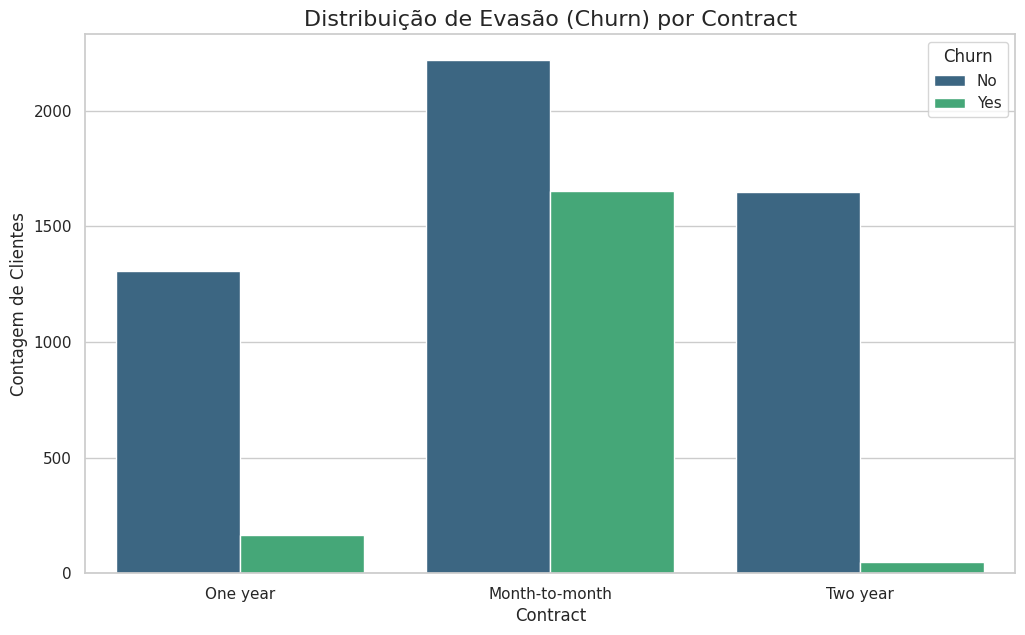

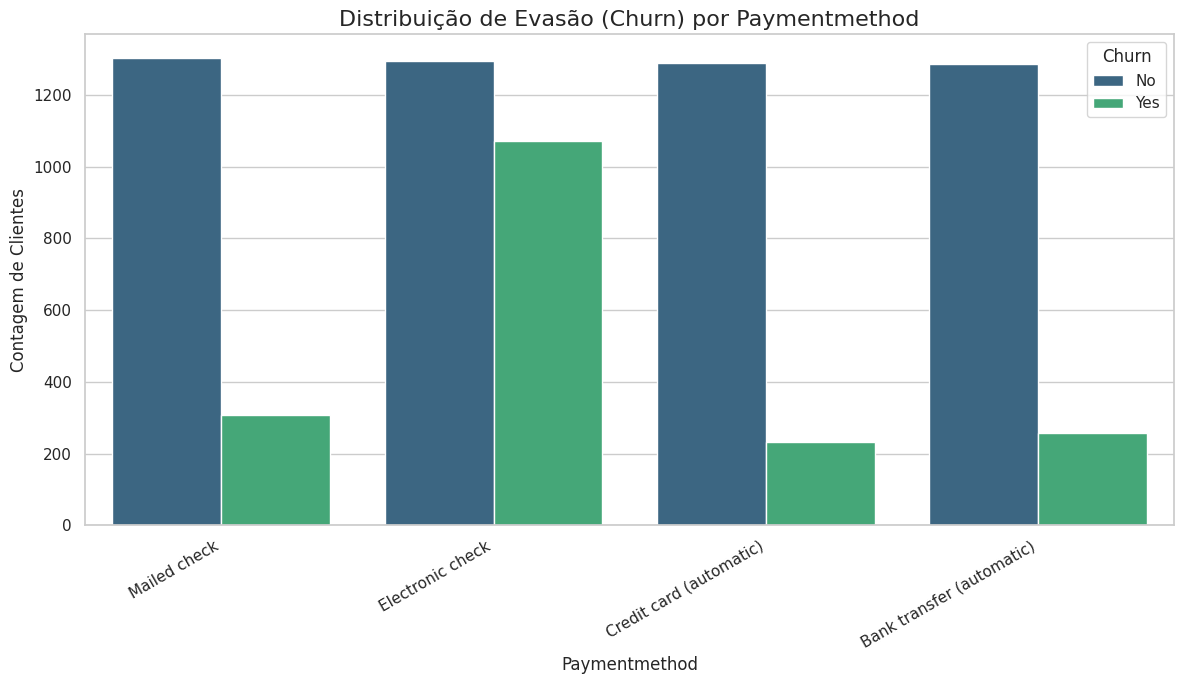

------------------------------------------------------------
Gerando gráfico para: gender...
Gerando gráfico para: InternetService...
Gerando gráfico para: Dependents...
Gerando gráfico para: TechSupport...


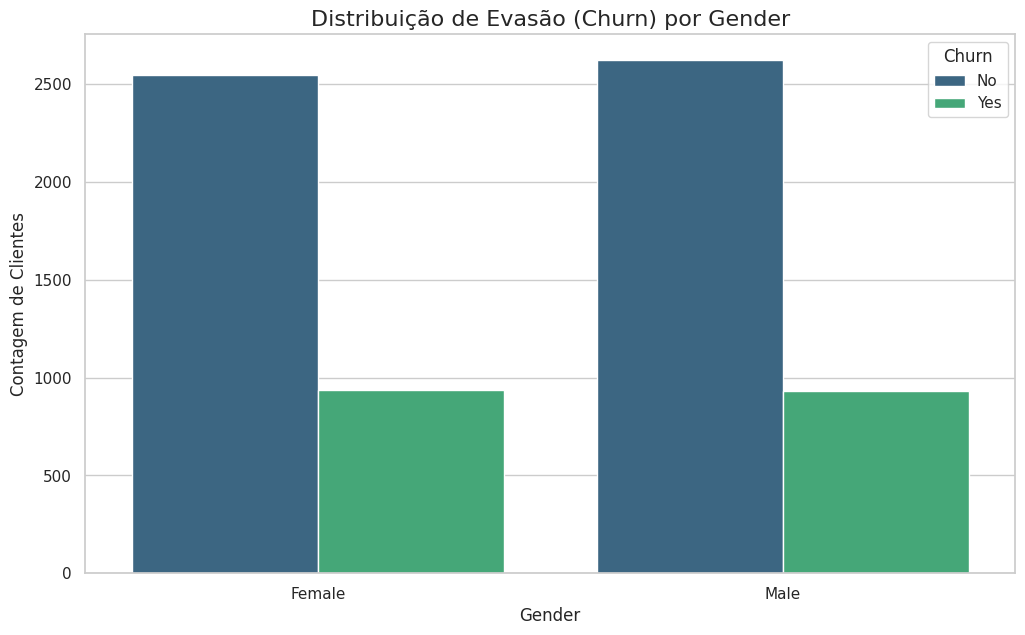

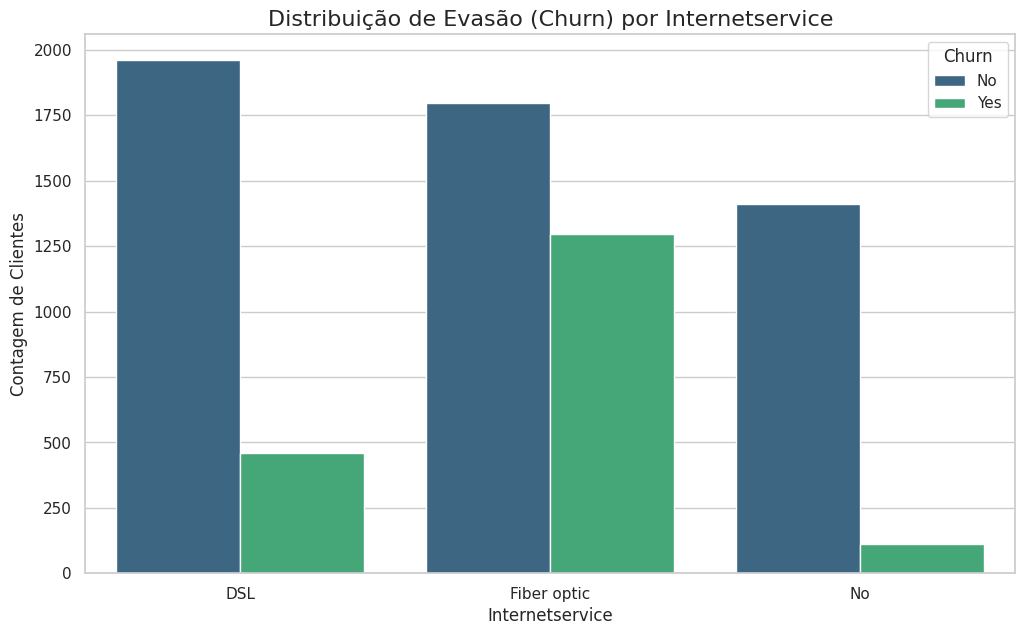

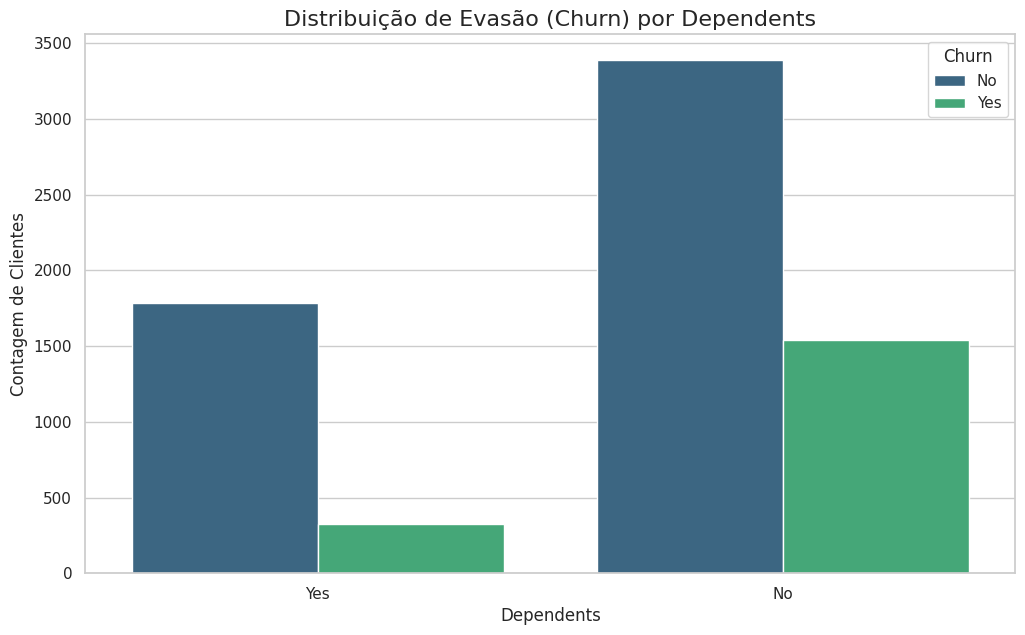

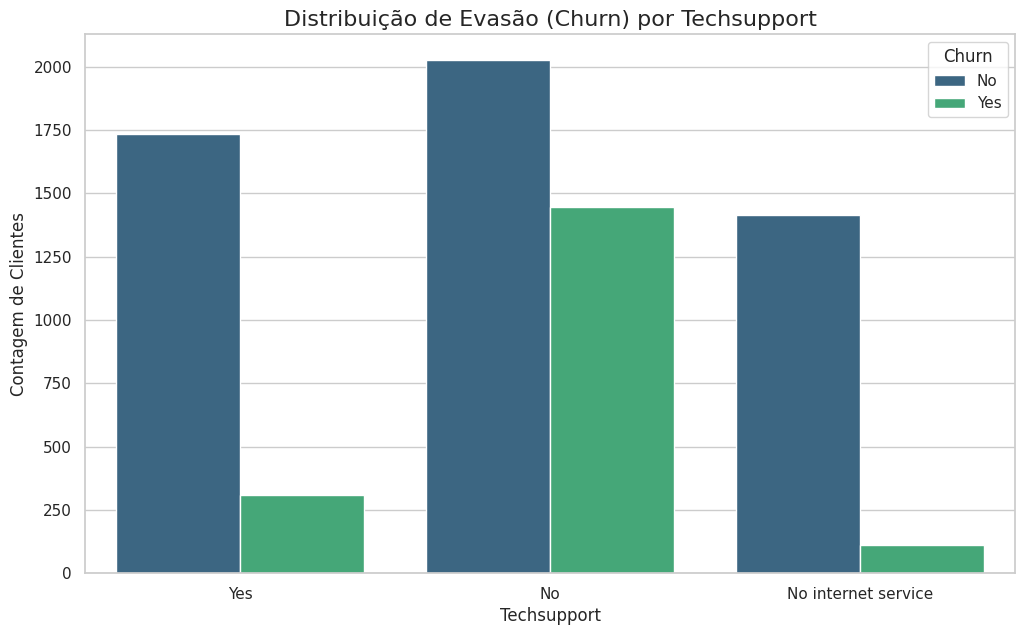

In [36]:
 # --- Etapa 3: Gerar os Gráficos ---

    # Definir um estilo visual padrão para todos os gráficos
sns.set_theme(style="whitegrid")

    # Lista das variáveis categóricas que queremos analisar
variaveis_para_analise = [
        'Contract',
        'PaymentMethod',
        'gender',
        'InternetService',
        'Dependents',
        'TechSupport'
    ]

    # Loop para criar um gráfico para cada variável da lista
for variavel in variaveis_para_analise:
  print(f"Gerando gráfico para: {variavel}...")

        # Criar a figura para o gráfico
  plt.figure(figsize=(12, 7))

        # Usar a função countplot do Seaborn para criar o gráfico de barras
        # x=variavel: define a variável categórica para o eixo X
        # hue='Churn': divide as barras em duas cores, uma para cada valor de Churn ('Yes' e 'No')
  ax = sns.countplot(data=df_limpo, x=variavel, hue='Churn', palette='viridis')

        # Definir um título claro para o gráfico
  titulo = f'Distribuição de Evasão (Churn) por {variavel.replace("_", " ").title()}'
  ax.set_title(titulo, fontsize=16)

        # Definir os rótulos dos eixos X e Y
  ax.set_xlabel(variavel.replace("_", " ").title(), fontsize=12)
  ax.set_ylabel('Contagem de Clientes', fontsize=12)
  ax.legend(title='Churn')

        # Se os nomes das categorias no eixo X forem longos, rotaciona para não sobrepor
  if df_limpo[variavel].nunique() > 3:
    plt.xticks(rotation=30, ha='right')

        # Ajusta o layout para garantir que nada seja cortado
    plt.tight_layout()

        # Exibe o gráfico no notebook
    plt.show()
    print("-" * 60)



Gerando gráficos para: Tenure...


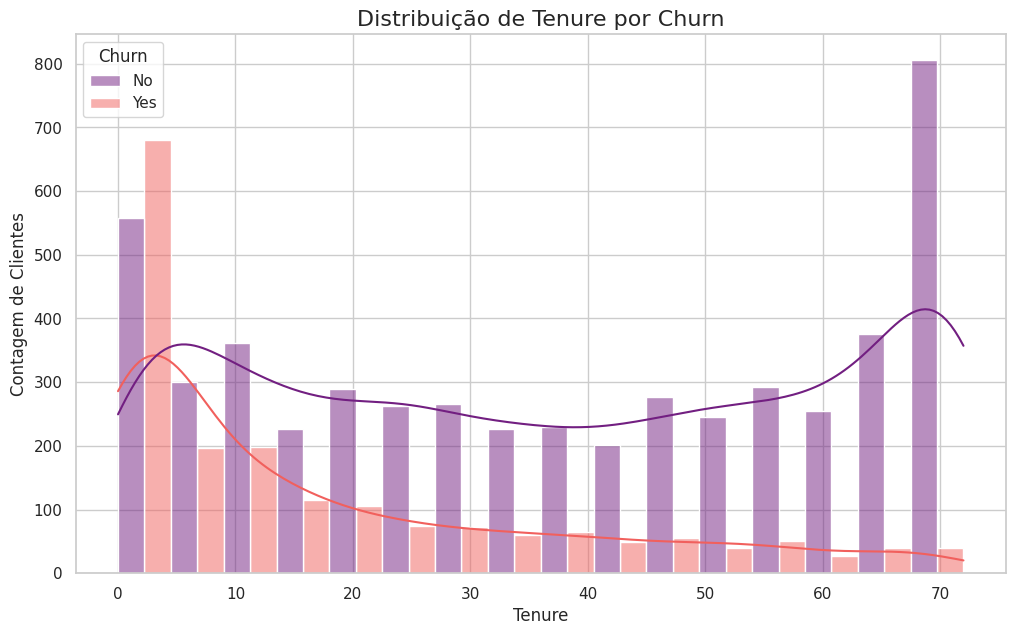

/tmp/ipython-input-37-3718497398.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y=variavel, palette='viridis')


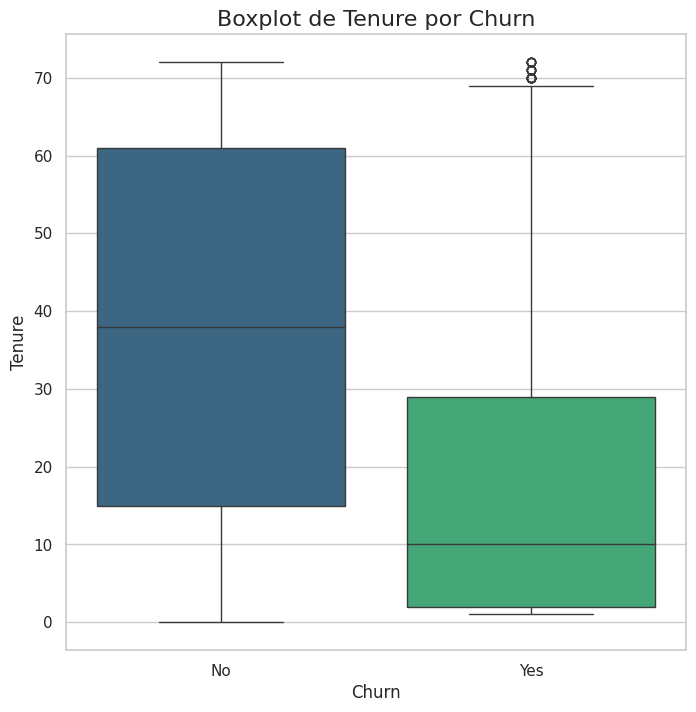

------------------------------------------------------------

Gerando gráficos para: Charges Monthly...


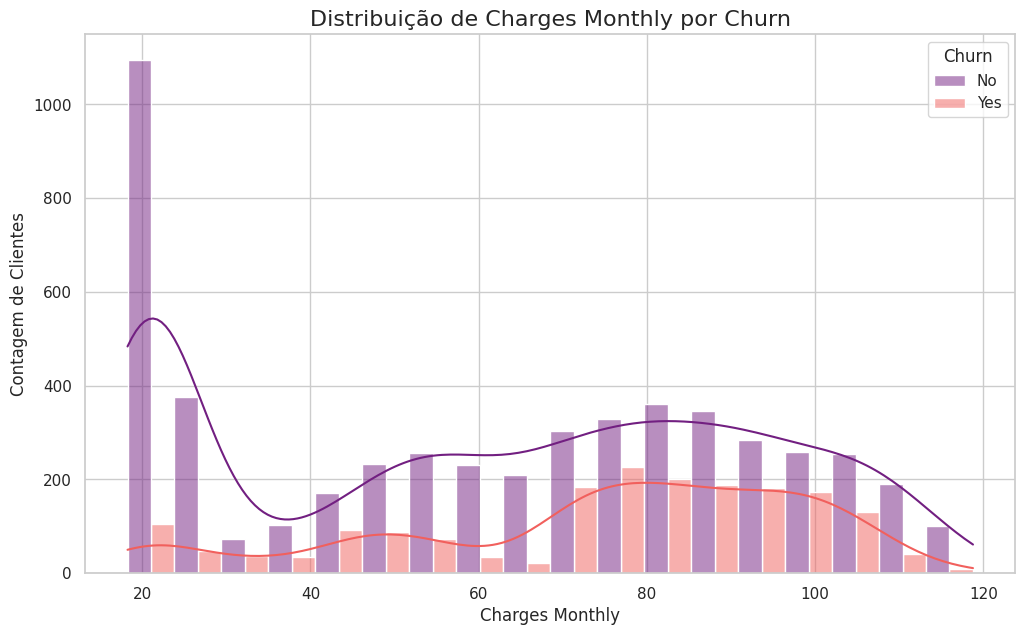

/tmp/ipython-input-37-3718497398.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y=variavel, palette='viridis')


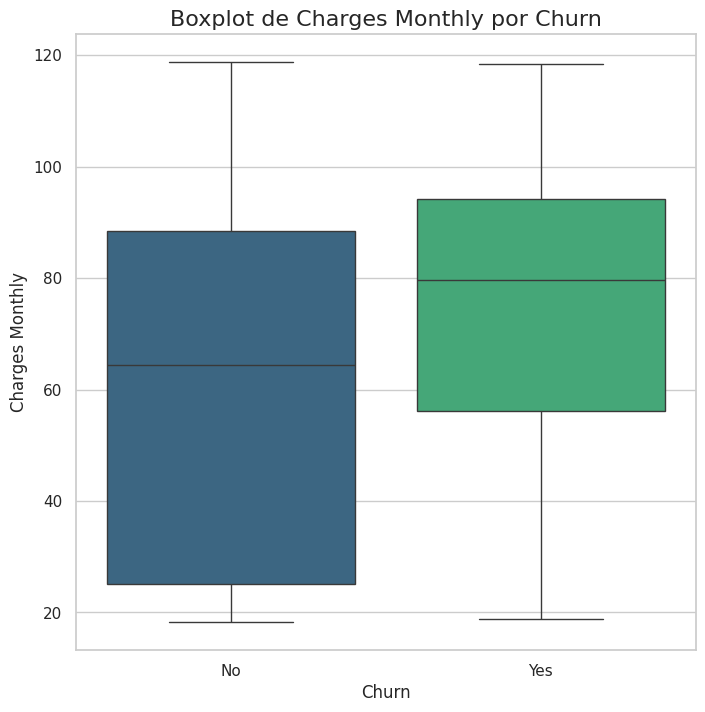

------------------------------------------------------------

Gerando gráficos para: Charges Total...


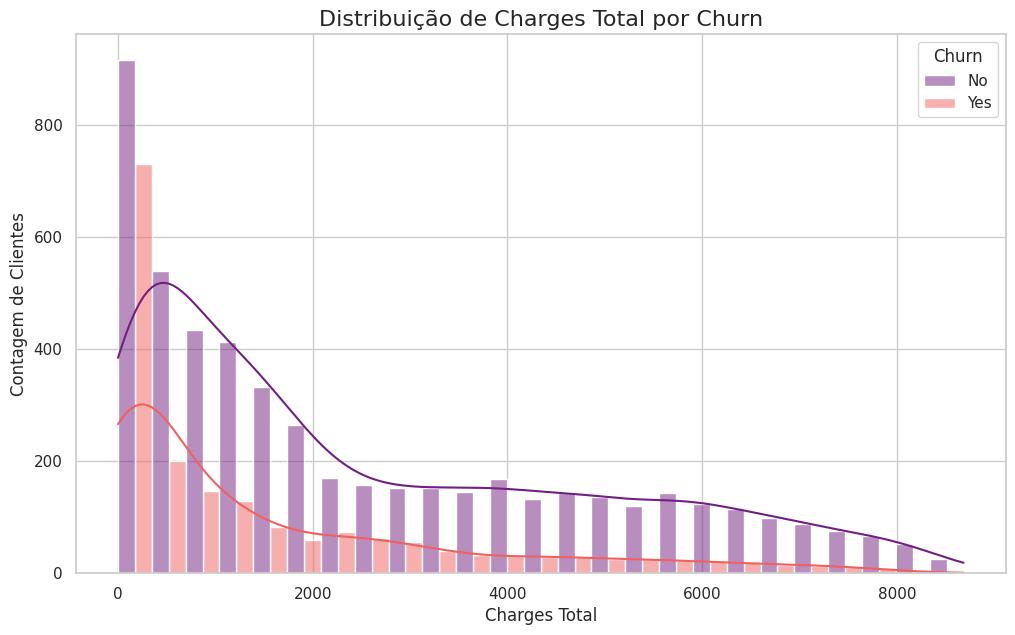

/tmp/ipython-input-37-3718497398.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y=variavel, palette='viridis')


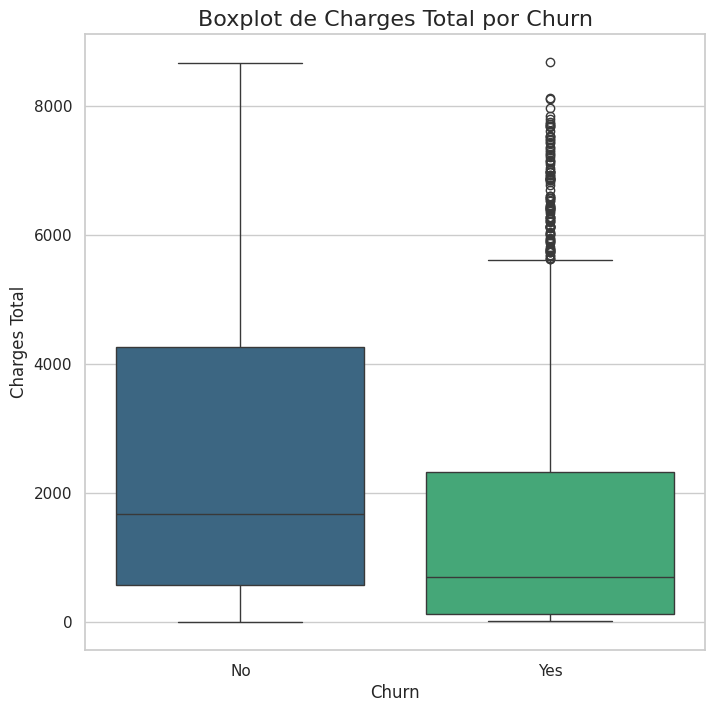

------------------------------------------------------------


In [37]:
# --- Etapa 3: Gerar os Gráficos ---

    # Definir um estilo visual padrão para todos os gráficos
sns.set_theme(style="whitegrid")

    # Lista das variáveis numéricas que queremos analisar
variaveis_numericas = ['tenure', 'Charges_Monthly', 'Charges_Total']

    # Loop para criar um par de gráficos (Histograma e Boxplot) para cada variável
for variavel in variaveis_numericas:
  print(f"\nGerando gráficos para: {variavel.replace('_', ' ').title()}...")

        # --- Histograma ---
  plt.figure(figsize=(12, 7))
  sns.histplot(data=df_limpo, x=variavel, hue='Churn', multiple="dodge", kde=True, palette='magma')
  titulo_hist = f'Distribuição de {variavel.replace("_", " ").title()} por Churn'
  plt.title(titulo_hist, fontsize=16)
  plt.xlabel(variavel.replace("_", " ").title(), fontsize=12)
  plt.ylabel('Contagem de Clientes', fontsize=12)
  plt.show()

        # --- Boxplot ---
  plt.figure(figsize=(8, 8))
  sns.boxplot(data=df_limpo, x='Churn', y=variavel, palette='viridis')
  titulo_box = f'Boxplot de {variavel.replace("_", " ").title()} por Churn'
  plt.title(titulo_box, fontsize=16)
  plt.xlabel('Churn', fontsize=12)
  plt.ylabel(variavel.replace("_", " ").title(), fontsize=12)
  plt.show()
  print("-" * 60)

#📄Relatorio Final

Relatório Final: Análise de Evasão de Clientes (Churn)
Data do Relatório: 23 de Junho de 2025

1. Objetivo da Análise
O objetivo deste trabalho foi realizar uma análise exploratória completa em um conjunto de dados de uma empresa de telecomunicações (TelecomX_Data.json). A meta principal era identificar os fatores que mais influenciam a evasão de clientes (Churn) e, a partir desses insights, traçar o perfil do cliente com maior risco de cancelamento, permitindo o direcionamento de ações estratégicas de retenção.

2. Processamento e Modificações dos Dados
Para garantir a qualidade e a usabilidade dos dados para análise, as seguintes etapas de modificação e limpeza foram executadas:

Carregamento e Estruturação:

O arquivo original (TelecomX_Data.json), que possuía uma estrutura aninhada, foi carregado.
Os dados foram "achatados" (normalizados) para um formato de tabela (DataFrame do pandas), com colunas devidamente nomeadas (ex: customer_gender, account_Contract).
Limpeza de Dados:

Cobrança Total: A coluna de cobrança total (account_Charges_Total) foi convertida de texto para formato numérico (float). Registros que estavam em branco (provavelmente de clientes novos) foram preenchidos com o valor 0.
Valores de Churn Vazios: Foram identificados e removidos 224 registros onde a coluna alvo Churn estava vazia, pois não poderiam ser utilizados na análise de evasão.
Espaços em Branco: Foi realizada uma limpeza para remover quaisquer espaços em branco no início ou fim dos valores de texto, garantindo a consistência das categorias.
Dados Duplicados: Foi verificado que não havia clientes (customerID) ou linhas duplicadas na base.
Engenharia de Features (Criação de Novas Variáveis):

Foi criada a coluna Contas_Diarias, calculada a partir da divisão da account_Charges_Monthly por 30, para oferecer uma perspectiva adicional sobre o custo do serviço.
Transformação para Modelagem:

Como preparação para futuras etapas de machine learning, os dados foram transformados para um formato inteiramente numérico, convertendo categorias como "Yes" e "No" para 1 e 0 e aplicando a técnica de One-Hot Encoding em colunas com múltiplas categorias.
3. Principais Constatações e Insights
A análise dos dados revelou padrões claros sobre o comportamento dos clientes.

Taxa de Evasão Geral: Aproximadamente 26,5% dos clientes na base de dados cancelaram o serviço. Embora a maioria permaneça, a taxa de perda é significativa.

Fatores Mais Influentes na Evasão:

Tipo de Contrato: É o fator de maior impacto. Clientes com contrato mensal (Month-to-month) são drasticamente mais propensos a cancelar do que clientes com contratos anuais ou de dois anos.
Tempo de Contrato (Tenure): Clientes novos (baixo tenure, especialmente nos primeiros 10 meses) representam a grande maioria dos cancelamentos. A lealdade aumenta substancialmente com o tempo.
Cobrança Mensal: Clientes com contas mensais mais altas (principalmente na faixa de $70-$110) têm uma taxa de churn muito superior. Isso está frequentemente associado aos planos de fibra óptica.
Método de Pagamento: O pagamento via cheque eletrônico (Electronic check) está associado a uma taxa de evasão notavelmente maior em comparação com métodos automáticos.
Serviços de Suporte: A ausência de serviços de valor agregado, como Suporte Técnico (TechSupport), aumenta significativamente a chance de um cliente cancelar ao enfrentar problemas.
Fatores de Baixo Impacto: Variáveis como gênero mostraram não ter uma influência relevante na decisão de churn.
4. Perfil do Cliente com Alto Risco de Evasão
Com base nas constatações, o perfil do cliente com maior probabilidade de cancelar o serviço pode ser descrito como:

Um cliente novo, com poucos meses de contrato, que está em um plano mensal. Ele provavelmente possui um serviço de fibra óptica, o que resulta em uma conta mensal elevada, e paga através de cheque eletrônico. Frequentemente, este cliente não possui serviços de suporte adicionais, como o suporte técnico.

5. Recomendações Estratégicas
As seguintes ações podem ser consideradas para mitigar a evasão de clientes:

Foco em Novos Clientes: Implementar um programa de onboarding robusto para clientes nos primeiros 3-6 meses, garantindo que eles extraiam o máximo de valor do serviço.
Incentivar Contratos de Longo Prazo: Criar campanhas e ofertas para migrar clientes do plano mensal para contratos anuais, oferecendo descontos ou benefícios claros.
Revisar a Oferta de Fibra Óptica: Analisar se o maior churn nesse serviço se deve a preço, instabilidade técnica ou expectativas desalinhadas, e agir sobre a causa raiz.
Promover Pagamentos Automáticos: Oferecer um pequeno incentivo (ex: um único desconto de $5) para clientes que mudarem do cheque eletrônico para o pagamento automático (cartão de crédito ou débito em conta).
Venda de Valor em Serviços Adicionais: Demonstrar ativamente o valor do Suporte Técnico e outros serviços de proteção durante o processo de venda e no início do ciclo de vida do cliente.